# Running Bar Chart using Python Matplolib library in few lines of codes

## Mustafa Fatakdawala May 2020


**We will be creating a running bar chart as shown below**

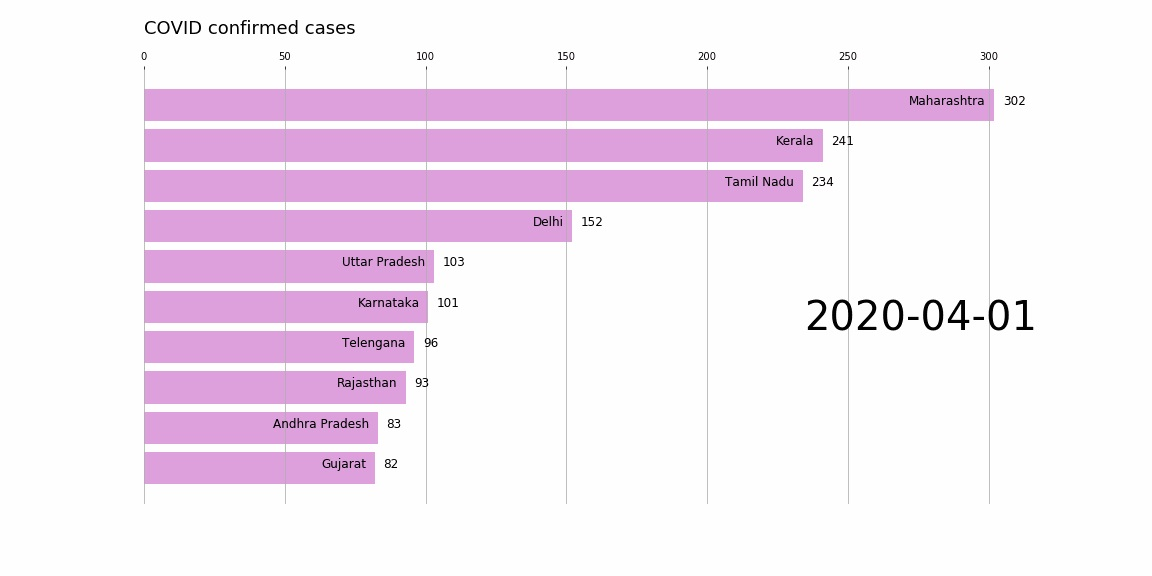


**We will be using COVID 19 India Data Set for this notebook.We can add the data COVID 19 India dataset using the add data option and search for "COVID 19 INDIA". Let's take a glimpse at the data by listing all the files we added.**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**We will be using covid_19_india.csv for our visualization. So lets us load the data and take a glimpse at the information available **

1. Sno = Serial Number
2. Date = Date of recording the Covid 19 count (format DD/MM/YY)
3. Time = Time of recording the Covid 19 count
4. State/UnionTerritory = Contains the full name of the State or the Union Territory 
5. ConfirmedIndianNational = Confirmed Indian National having Covid 19 as of this date in a given State or Union Territory
6. ConfirmedForeignNational = Confirmed Foreign National having Covid 19 as of this date in a given State or Union Territory
7. Cured = Count of Patient recovered or cured as of this date in a given State or Union Territory
8. Deaths = Count of patient who have died as of this date in a given State or Union Territory
9. Confirmed = Count of Total Patient having Covid 19 as of this date in a given State or Union Territory


In [ ]:
# we will be using only the following columns 
# Date ,State/Union Territory & Confirmed Count

use_columns = ['Date' , 'State/UnionTerritory', 'Confirmed']
import pandas as pd
df = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv' , usecols = use_columns)
# Let us convert the date from String into YYYY-MM-DD format using pandas to_datetime function
df['Date'] =pd.to_datetime(df['Date'] , format='%d/%m/%y')
df.head(5)


# Let us get the 10 States/Union Territory with the highest Confirmed cases for a given day and plot the horizontal bar graph

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
current_date = '2020-04-30'
df_10 = (df[df['Date']==current_date]
       .sort_values(by='Confirmed', ascending=False)
       .head(10))
print(df_10)

fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(df_10['State/UnionTerritory'], df_10['Confirmed'])

# Since we are getting the States/Union Territory with the highest count at the bottom , let's flip it and add some colors and style


In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
df_10= df_10[::-1]   # States with highest count will be pushed down - so that it shows up in the graph

ax.barh(df_10['State/UnionTerritory'], df_10['Confirmed'] , color ='plum')

for i, (count, region) in enumerate(zip(df_10['Confirmed'], df_10['State/UnionTerritory'])):
    ax.text(count, i,     region,      size=12,      ha='right' )  # Maharashtra
    ax.text(count, i,     count,       size=12  ,  ha='left')   # 9915

ax.text(1, 0.4, current_date, transform=ax.transAxes, size=40, ha='right') # add the date 

# Mission accomplished - now lets create a function which takes input as a date and produce the above graph

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
def draw_horizontal_bar (date):
    ax.clear()  # this is important - as each function execution should run on fresh axis 
    df_10 = (df[df['Date']==date].sort_values(by='Confirmed', ascending=False).head(10))
    df_10= df_10[::-1] # flip the values
    ax.barh(df_10['State/UnionTerritory'], df_10['Confirmed'] , color ='plum')
    filler = df_10['Confirmed'].max() /100 #  to add space between the States/UnionTerritory Name and the count
    
    for i, (count, region) in enumerate(zip(df_10['Confirmed'], df_10['State/UnionTerritory'])):
        ax.text(count -filler, i,     region,      size=12,  weight =400,    ha='right' )  # Maharashtra
        ax.text(count +filler , i,     count,       size=12  ,  ha='left')   # 9915

    ax.text(1, 0.4, date, transform=ax.transAxes, size=40, ha='right') # add the date 
    ax.text(0, 1.08, 'COVID confirmed cases', transform=ax.transAxes, size=18, color='black')
    ax.xaxis.set_ticks_position('top')
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_yticks([])
    ax.text(0, 1.20, 'States with highest COVID 19 Confirmed Cases in INDIA',
            transform=ax.transAxes, size=24,  ha='left')
    plt.box(False) # remove the box 
    

draw_horizontal_bar('2020-04-30')

# Lets create the animation from 1st of April 

In [ ]:
# Lets us get all the dates 

all_dates = df[df['Date'] >= '2020-04-01']['Date'].astype(str).to_list() # this is contain duplicates
dates = list(set(all_dates)) # we get uniques dates - but they are not sorted
dates = sorted(dates) # all dates arranged in order 

import matplotlib.animation as animation # import animation 
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(16, 8))
anim = animation.FuncAnimation(fig, draw_horizontal_bar, frames=dates) # this will call our 
# function for all the dates one by one
HTML(anim.to_jshtml()) 




# Lets store our animation as a GIF image

In [ ]:
f = r"covid_india.gif" 
writergif = animation.PillowWriter(fps=4) 
anim.save(f, writer=writergif)